In [187]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV
import math 
import pylab
import scipy.stats as stats
from sklearn.metrics import r2_score
print('Setup Complete')

Setup Complete


In [188]:
df = pd.read_csv(r"C:\Users\uniqu\Downloads\Coding Project Datasets\CoffeeShop\coffee_shop_revenue.csv")
df.head()

,Number_of_Customers_Per_Day,Average_Order_Value,Operating_Hours_Per_Day,Number_of_Employees,Marketing_Spend_Per_Day,Location_Foot_Traffic,Daily_Revenue
0,152,6.74,14,4,106.62,97,1547.81
1,485,4.50,12,8,57.83,744,2084.68
2,398,9.09,6,6,91.76,636,3118.39
3,320,8.48,17,4,462.63,770,2912.20
4,156,7.44,17,2,412.52,232,1663.42


In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Number_of_Customers_Per_Day  2000 non-null   int64  
 1   Average_Order_Value          2000 non-null   float64
 2   Operating_Hours_Per_Day      2000 non-null   int64  
 3   Number_of_Employees          2000 non-null   int64  
 4   Marketing_Spend_Per_Day      2000 non-null   float64
 5   Location_Foot_Traffic        2000 non-null   int64  
 6   Daily_Revenue                2000 non-null   float64
dtypes: float64(3), int64(4)
memory usage: 109.5 KB


In [190]:
df.describe()

,Number_of_Customers_Per_Day,Average_Order_Value,Operating_Hours_Per_Day,Number_of_Employees,Marketing_Spend_Per_Day,Location_Foot_Traffic,Daily_Revenue
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,274.296000,6.261215,11.667000,7.947000,252.614160,534.893500,1917.325940
std,129.441933,2.175832,3.438608,3.742218,141.136004,271.662295,976.202746
min,50.000000,2.500000,6.000000,2.000000,10.120000,50.000000,-58.950000
25%,164.000000,4.410000,9.000000,5.000000,130.125000,302.000000,1140.085000
50%,275.000000,6.300000,12.000000,8.000000,250.995000,540.000000,1770.775000
75%,386.000000,8.120000,15.000000,11.000000,375.352500,767.000000,2530.455000
max,499.000000,10.000000,17.000000,14.000000,499.740000,999.000000,5114.600000


In [191]:
df.shape

(2000, 7)

In [192]:
missing = df.isnull().sum()
missing

Number_of_Customers_Per_Day    0
Average_Order_Value            0
Operating_Hours_Per_Day        0
Number_of_Employees            0
Marketing_Spend_Per_Day        0
Location_Foot_Traffic          0
Daily_Revenue                  0
dtype: int64

In [193]:
duplicates = df.duplicated().sum()
duplicates

np.int64(0)

# Data Exploration

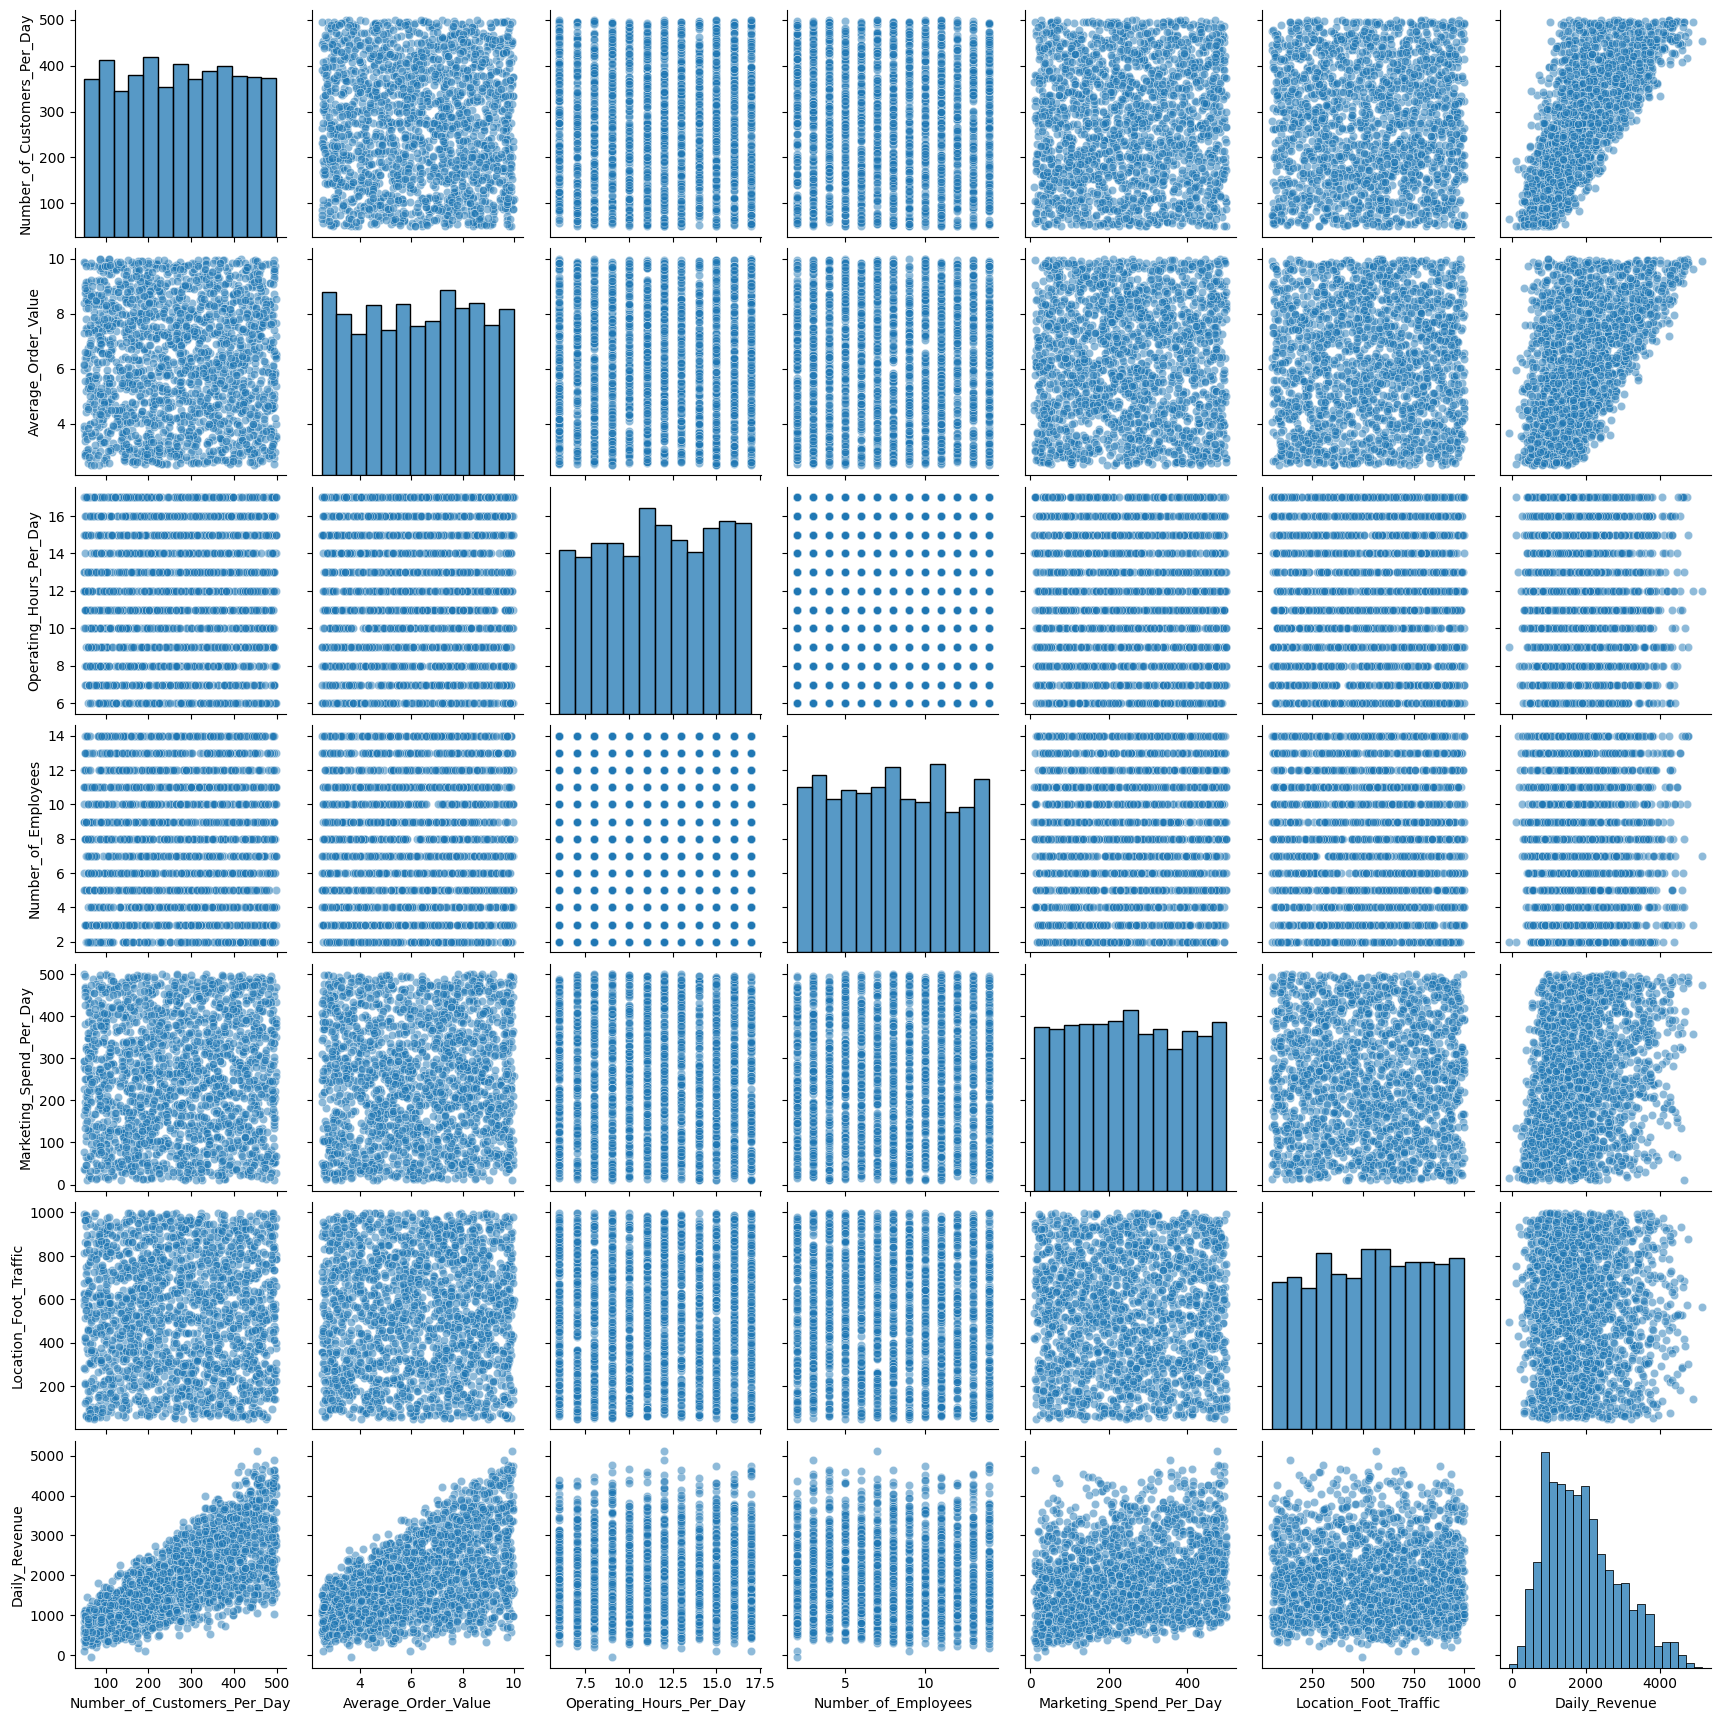

In [194]:
sns.pairplot(df, kind="scatter", plot_kws = {"alpha": 0.5})

In [195]:
# Number of customers per day had a strong corelation with daily revenue, with average order value also having a strong corelation
# Theres no corelation between operating hours and number of employees
# There was only a faint amount of correlation for marketing and location with daily revenue

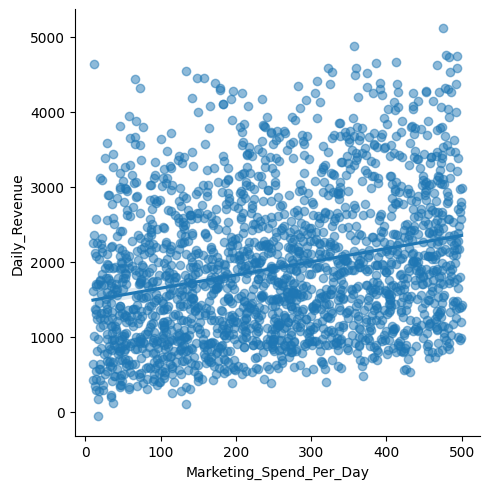

In [196]:
sns.lmplot(x="Marketing_Spend_Per_Day", y="Daily_Revenue", data=df, scatter_kws ={ 'alpha': 0.5})

In [197]:
X = df[['Number_of_Customers_Per_Day',
'Average_Order_Value',
'Operating_Hours_Per_Day',
'Number_of_Employees',
'Marketing_Spend_Per_Day',
'Location_Foot_Traffic']]

y = df['Daily_Revenue']

In [198]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# Method 1: Linear Regression

In [199]:
lm = LinearRegression()

In [200]:
lm.fit(X_train, y_train)

LinearRegression()

In [201]:
lm.coef_

array([ 5.58337809e+00,  2.45015602e+02, -3.14338309e-01, -1.75560201e+00,
        1.56427649e+00,  1.93756379e-02])

In [202]:
cdf = pd.DataFrame(lm.coef_, X.columns, columns = ['Coeff'])
cdf

,Coeff
Number_of_Customers_Per_Day,5.583378
Average_Order_Value,245.015602
Operating_Hours_Per_Day,-0.314338
Number_of_Employees,-1.755602
Marketing_Spend_Per_Day,1.564276
Location_Foot_Traffic,0.019376


In [203]:
# Average_Order_Value is most important to the model. While Operating_Hours_Per_Day and Number_of_Employees is the least important

In [204]:
# Predictions

In [205]:
predictions = lm.predict(X_test)
predictions

array([3139.36092896, 1312.453101  , 2580.97757359, 2027.78112315,
       2270.09166675,  881.23052824, 1300.59424136, 3489.73737595,
        874.66339514,  820.58187594,  559.1441532 , 1072.86867754,
       2297.08597277, 1690.54391283, 3466.18778385, 1964.51322758,
       3909.49635623, 2864.72232621, 3081.35439121, 2953.68696325,
       2149.98967081,  306.78811231, 3516.98678658,  789.79606417,
       2195.82447996, 2230.89986359, 2685.8363554 , 3378.0135815 ,
       2291.92510081, 2574.55410143, 1866.32271665, 1009.20386789,
       3317.65460174, 1811.94919377, 2005.6508253 ,  692.24665869,
       2403.56240338, 2372.20781058, 2561.4093725 , 2231.72744986,
        835.55470565, 1529.49804039,  838.72879289, 1817.22961332,
       2656.30030422, 1554.52882302, -149.11165319, 2510.13125556,
       3337.84388053, 1163.76753127, 2032.11063987,  897.45542779,
       1426.72026406, 2720.71038024, 1683.90816515, 2432.0345324 ,
       2404.87114389, 1258.14283618, 1985.90358362, 1948.73254

Text(0, 0.5, 'Evaluation of the LM model')

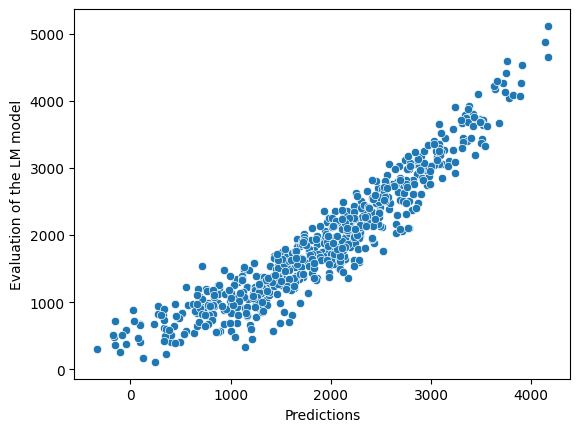

In [206]:
sns.scatterplot(x=predictions, y=y_test)
plt.xlabel('Predictions')
plt.ylabel('Evaluation of the LM model')

In [207]:
# Our model seem to be good because its forming a straight line

In [208]:
print("Mean Absolute Error:", mean_absolute_error(y_test, predictions))
print("Mean Squared Error:", mean_squared_error(y_test, predictions))
print("Root Mean Squared Error:", math.sqrt(mean_squared_error(y_test, predictions)))
print("R-squared:", r2_score(y_test, predictions))

Mean Absolute Error: 245.85184575523667
Mean Squared Error: 97065.55246954598
Root Mean Squared Error: 311.5534504215063
R-squared: 0.891897091763772


In [209]:
# residuals

In [210]:
residuals = y_test - predictions
residuals

1860    304.329071
353    -291.373101
1333   -196.557574
905     170.568877
1289   -281.201667
           ...    
148     209.564725
1554      4.547840
1956    354.576278
925    -666.614780
942    -209.850783
Name: Daily_Revenue, Length: 600, dtype: float64

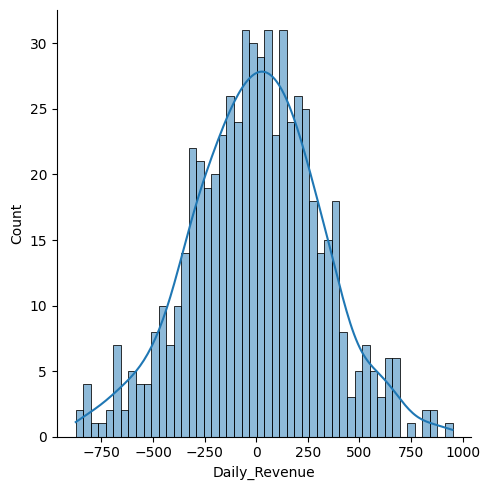

In [211]:
sns.displot(residuals, bins = 50, kde = True)

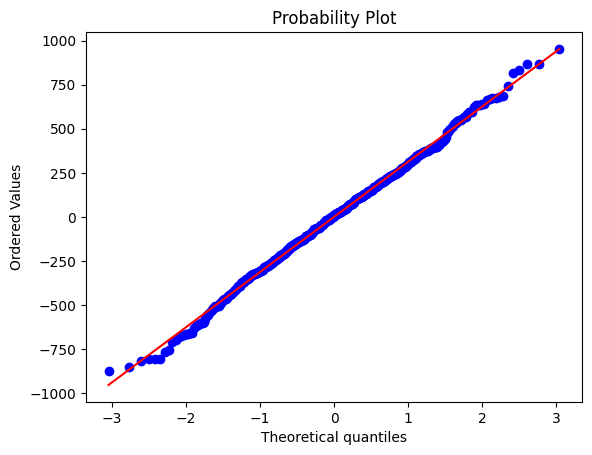

In [212]:
stats.probplot(residuals, dist="norm", plot=pylab)
pylab.show()

# Method 2: Random Forest Regression

In [213]:
model = RandomForestRegressor(n_estimators=500, max_features = 7, random_state=42, max_samples=60, oob_score=True)
rf= model.fit(X_train, y_train)
print("OOB Score:", rf.oob_score_)

OOB Score: 0.913201571924309


<Axes: >

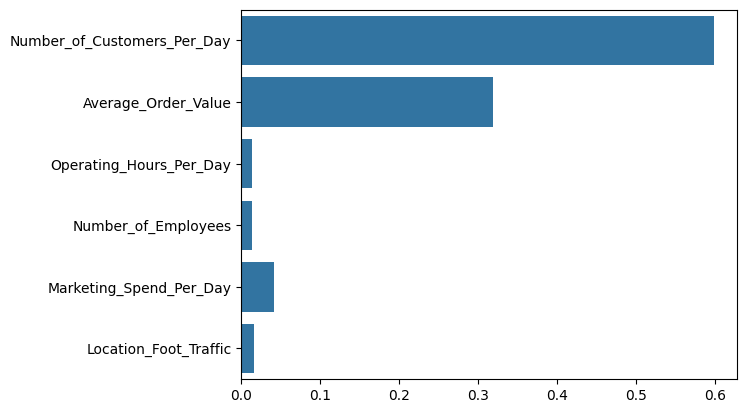

In [214]:
sns.barplot(x=rf.feature_importances_, y = rf.feature_names_in_)

In [215]:
pred_price = rf.predict(X_test)
y_test

1860    3443.69
353     1021.08
1333    2384.42
905     2198.35
1289    1988.89
         ...   
148     1323.79
1554    1657.61
1956    1583.67
925     2105.49
942     2233.45
Name: Daily_Revenue, Length: 600, dtype: float64

In [216]:
mae = mean_absolute_error(y_true=y_test, y_pred=pred_price)
print("MAE:", mae)

mse = mean_squared_error(y_true=y_test, y_pred=pred_price)
print("MSE:", mse)

MAE: 224.9620677666666
MSE: 80572.77862263417


<Axes: xlabel='Daily_Revenue', ylabel='Daily_Revenue'>

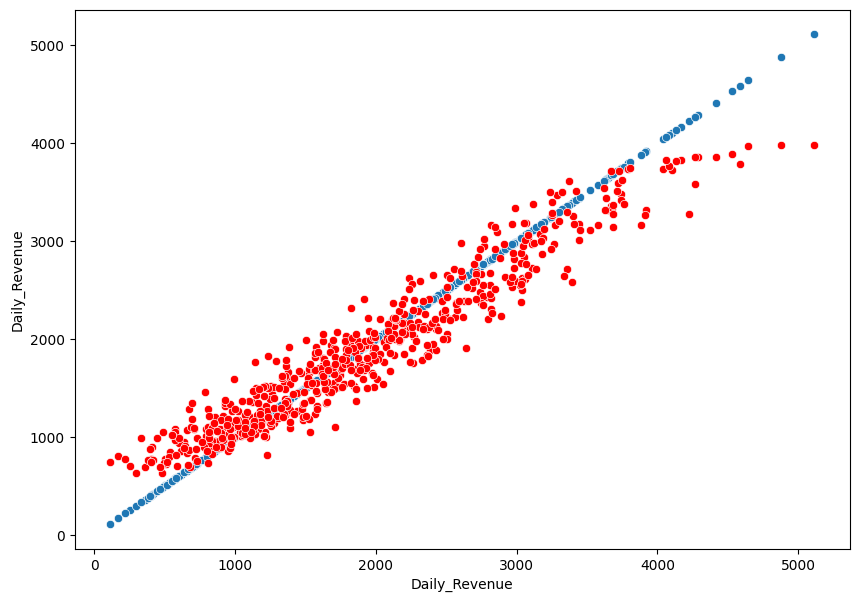

In [217]:
fix, ax = plt.subplots(figsize=(10, 7))
sns.scatterplot(x=y_test, y=y_test, ax=ax)
sns.scatterplot(x=y_test, y=pred_price, ax=ax, color='red')

# Method 3: Lasso Regression

In [218]:
lasso = Lasso()
lasso.fit(X_train, y_train)

Lasso()

In [219]:
y_pred = lasso.predict(X_test)

In [220]:
mean_absolute_error(y_test, y_pred)
print("MAE:", mean_absolute_error(y_test, y_pred))
mean_squared_error(y_test, y_pred)
print("MSE:", mean_squared_error(y_test, y_pred))
r2_score(y_test, y_pred)
print("R2 Score:", r2_score(y_test, y_pred))

MAE: 245.82597230189776
MSE: 97057.73546546655
R2 Score: 0.8919057976419459


In [221]:
param_grid = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
}

lasso_cv = GridSearchCV(lasso, param_grid, cv=5, n_jobs=-1)

In [222]:
lasso_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]})

In [223]:
y_pred2 = lasso_cv.predict(X_test)

In [224]:
mean_absolute_error(y_test, y_pred2)
print("MAE:", mean_absolute_error(y_test, y_pred2))
mean_squared_error(y_test, y_pred2)
print("MSE:", mean_squared_error(y_test, y_pred2))
r2_score(y_test, y_pred2)
print("R2 Score:", r2_score(y_test, y_pred2))

MAE: 245.65007797778884
MSE: 97014.93784326814
R2 Score: 0.8919534617957835
